In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn import metrics


In [2]:
gold_data=pd.read_csv('C:/Users/KIIT/Downloads/gld_price_data.csv')
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
gold_data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [4]:
gold_data.tail(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.8000,15.3800,1.208123
2281,5/1/2018,2654.800049,123.709999,13.6100,15.2400,1.199156
2282,5/2/2018,2635.669922,123.650002,13.6700,15.4200,1.195100
2283,5/3/2018,2629.729980,124.279999,13.8200,15.4600,1.198926
2284,5/7/2018,2672.629883,124.570000,14.1000,15.5200,1.193374
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_data.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
x=gold_data.corr()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_22064\2550158728.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x=gold_data.corr()


In [9]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
lin_reg_model=LinearRegression()

In [28]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [30]:
test_data_prediction=lin_reg_model.predict(X_test)
test_data_prediction

array([159.45290968,  81.50858067, 113.4868037 , 128.55153817,
       126.20403783, 141.31818338, 165.49416492, 124.44197659,
       113.95389904, 122.9965895 , 113.95492464, 174.89529849,
       132.66890174, 159.24793304, 118.8791679 , 122.14315717,
       150.37153054, 161.27175405, 152.2792036 , 162.19946709,
       145.88372183, 118.07669395, 180.21729122, 178.13331554,
       123.51701986,  98.82914322,  76.63486248, 119.38435511,
       113.85027665, 159.25706609,  93.76037617, 120.05334649,
        88.61086583, 114.28801659, 112.77954274, 144.19518102,
       118.78252489, 115.87334354, 144.06409553, 113.81864246,
       100.49676727,  89.42842238, 120.36720699, 110.47635305,
       146.4894628 , 119.30321261, 110.99311348, 111.3386287 ,
        96.48139076, 123.40842816,  79.51413425, 115.36111603,
       121.78896764, 114.55367722, 120.9074622 , 117.10612464,
       152.31198525, 182.7735091 , 196.73570503,  91.06670951,
       101.92097594,  87.48443506,  94.33158785, 119.17

In [31]:
error=metrics.r2_score(Y_test,test_data_prediction)
print("Squared Error: ",error)

Squared Error:  0.8657886565869237


In [32]:
Y_test=list(Y_test)

In [33]:
las_reg_model=Lasso()

In [34]:
las_reg_model.fit(X_train,Y_train)

Lasso()

In [35]:
test_data_prediction=las_reg_model.predict(X_test)
test_data_prediction

array([158.84512104,  81.04703403, 113.21813043, 128.24921821,
       125.52591531, 140.30328872, 165.77178016, 125.05258374,
       114.14910705, 123.5210702 , 114.13628642, 175.00866734,
       132.57640461, 158.51043648, 117.92572817, 121.77591509,
       150.20780434, 160.68906278, 151.64461382, 161.99333696,
       145.4120571 , 118.34738175, 180.39772754, 178.24472286,
       124.27696964,  99.80255205,  76.60316115, 120.19171432,
       114.14002363, 158.50355697,  94.04763779, 120.96974119,
        87.74083986, 113.98321611, 112.01201714, 143.73115966,
       117.95660144, 115.64610606, 143.40791656, 113.24451605,
       101.05231751,  89.20936638, 121.32125716, 110.20612872,
       145.64975126, 120.04248218, 110.9111235 , 110.91371884,
        96.98342951, 124.04251147,  78.81883439, 114.75212601,
       121.30272027, 114.15079702, 121.28412116, 117.14793   ,
       152.17201044, 182.85683662, 196.50648401,  91.38003712,
       102.03203664,  87.21288355,  94.86738033, 119.75

In [36]:
error=metrics.r2_score(Y_test,test_data_prediction)
print("Squared Error: ",error)

Squared Error:  0.8644937172756186


In [37]:
Y_test=list(Y_test)

In [40]:
xgb_reg_model=XGBRegressor()

In [41]:
xgb_reg_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [48]:
test_data_prediction=xgb_reg_model.predict(X_test)
test_data_prediction

array([167.99673 ,  81.257   , 115.680504, 128.40234 , 119.90543 ,
       154.21127 , 147.662   , 125.648315, 117.25356 , 126.00609 ,
       115.62989 , 171.755   , 142.69296 , 165.95056 , 115.677155,
       117.85581 , 134.05186 , 170.32123 , 155.57777 , 158.895   ,
       155.08844 , 126.040794, 175.17639 , 154.82768 , 125.294304,
        93.38418 ,  75.03659 , 120.27448 , 119.14891 , 167.87407 ,
        88.307594, 124.14658 ,  90.55532 , 118.48616 , 121.23947 ,
       141.665   , 115.25906 , 113.90981 , 136.21347 , 108.42582 ,
       103.82606 ,  87.17343 , 127.023605, 118.14248 , 152.48473 ,
       119.41017 , 111.29818 , 107.83849 ,  93.21376 , 127.51094 ,
        74.81875 , 112.99162 , 121.51871 , 111.21432 , 118.99881 ,
       121.33489 , 163.32918 , 171.3393  , 146.78625 ,  87.43396 ,
        95.01052 ,  87.585846,  89.28714 , 118.76987 , 127.15954 ,
       127.46486 , 172.55789 , 122.397545, 116.96136 ,  98.952446,
       168.39165 , 144.549   , 132.06133 , 121.1305  , 121.242

In [49]:
error=metrics.r2_score(Y_test,test_data_prediction)
print("Squared Error: ",error)

Squared Error:  0.9863662857281045


In [43]:
Y_test=list(Y_test)

In [46]:
ext_reg_model=ExtraTreesRegressor()

In [47]:
ext_reg_model.fit(X_train,Y_train)

ExtraTreesRegressor()

In [50]:
test_data_prediction=ext_reg_model.predict(X_test)
test_data_prediction

array([168.25379908,  81.56800035, 115.75599979, 128.18360075,
       120.59850151, 154.43739928, 148.87130054, 126.23920124,
       117.55989863, 125.74690177, 116.39620151, 173.12620151,
       141.96069975, 168.12749865, 114.91830058, 118.54270054,
       134.76430357, 170.31220068, 159.41380082, 163.4050993 ,
       155.33370044, 125.56459977, 175.95309934, 156.71980394,
       125.17690065,  94.55169966,  77.06940066, 120.25029973,
       119.20870028, 167.54519835,  87.76850108, 125.58830096,
        91.33740043, 116.83560118, 120.86869921, 136.90560095,
       115.37150182, 113.02840028, 143.87840046, 107.1971011 ,
       105.26630281,  87.0812981 , 126.67150085, 117.95919943,
       151.01299963, 119.35240028, 109.37900034, 107.53799717,
        93.12730052, 127.33949727,  74.45350037, 113.6649003 ,
       120.91809981, 111.05440004, 118.91909899, 120.70029929,
       158.96209985, 162.77230164, 146.92359611,  86.23519942,
        94.08659979,  86.52069946,  90.09899993, 118.59

In [51]:
error=metrics.r2_score(Y_test,test_data_prediction)
print("Squared Error: ",error)

Squared Error:  0.9934064350128758


In [52]:
Y_test=list(Y_test)


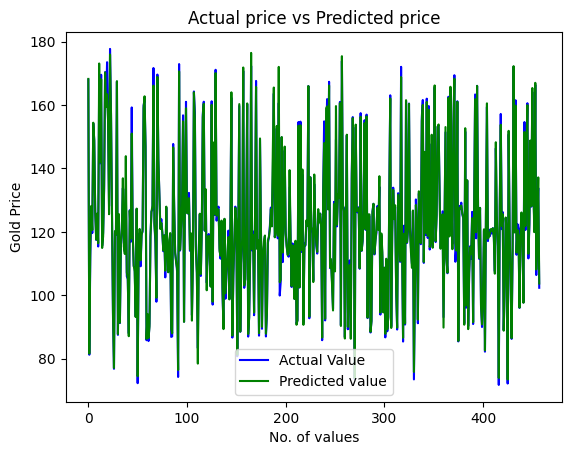

In [53]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green', label='Predicted value')
plt.title('Actual price vs Predicted price')
plt.xlabel('No. of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [11]:
reg=RandomForestRegressor(n_estimators=100)


In [12]:
reg.fit(X_train,Y_train)

RandomForestRegressor()

In [13]:
test_data_prediction=reg.predict(X_test)

In [14]:
test_data_prediction

array([168.54839964,  81.83830002, 116.06240044, 127.60780078,
       120.79460124, 154.7856982 , 150.39479736, 125.93290028,
       117.46029871, 126.01040086, 116.49910139, 172.02470105,
       141.73469866, 167.86649854, 115.28220008, 117.71910047,
       139.39200243, 170.12470099, 159.905303  , 161.45319967,
       155.14770059, 125.08150007, 175.83589943, 157.39250338,
       125.17670042,  93.66159975,  76.91890037, 120.64680016,
       118.97929869, 167.52799987,  88.27390061, 125.33279986,
        91.10340067, 117.62280028, 121.23159909, 136.60460102,
       115.62110115, 115.29610066, 148.24119982, 107.07810101,
       104.4207023 ,  87.12079767, 126.51750042, 118.01950016,
       153.44789856, 119.66600001, 108.339     , 108.11219845,
        93.23630006, 126.99439792,  74.66250034, 113.66269931,
       121.31980003, 111.13869948, 118.9192989 , 119.87559975,
       158.60519937, 168.75090164, 147.12529629,  86.00959862,
        94.63270034,  86.80359936,  90.48039994, 119.00

In [24]:
from sklearn.metrics import mean_absolute_error
error=metrics.r2_score(Y_test,test_data_prediction)
print("Squared Error: ",error)

Squared Error:  0.9899827587550397


In [16]:
Y_test=list(Y_test)


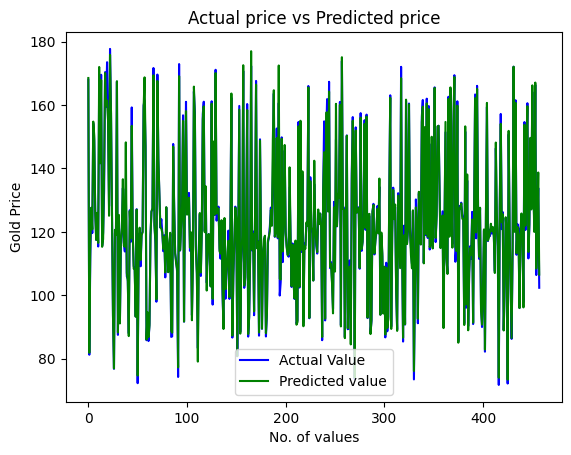

In [21]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green', label='Predicted value')
plt.title('Actual price vs Predicted price')
plt.xlabel('No. of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()